<a href="https://colab.research.google.com/github/lomatHaiderC/Sentiment-Analysis-of-Product-Review/blob/main/Data_Analysis_Project_on_Product_Review_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Bangla Sentiment Analysis (Group - 11)

##### Imports

In [ ]:
import numpy as np
import pandas as pd
import re, json

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

##### Loading Dataset

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/Data Analytics/'
data = pd.read_excel(path + 'dataset.xlsx')

data = data.drop(columns = ['Unnamed: 1'])
data['Sentiment'] = data['Sentiment'].str.capitalize()

data.head()

,Review,Sentiment
0,দাম অনুযায়ী প্রোডাক্ট ঠিক আছে,Positive
1,কিন্তু ওড়না পর্যন্ত সেলাই করে নিতে হবে সেটা আগ...,Neutral
2,প্রোডাক্টের মান ভালো না,Negative
3,কাপড়ে দাগ ছিল,Negative
4,তাছাড়া ছবিতে যেমটা বাস্তবে তেমনটা নয়,Negative


##### Data Summary (High Level)

In [ ]:
print("Data Resolution:", data.shape,
      "\nData Columns:", data.columns,
      "\n\nTotal Reviews:", len(data),
      "\nTotal Positive Reviews:", len(data[data.Sentiment == 'Positive']),
      "\nTotal Negative Reviews:", len(data[data.Sentiment == 'Negative']),
      "\nTotal Neutral Reviews:", len(data[data.Sentiment == 'Neutral']))

Data Resolution: (523, 2) 
Data Columns: Index(['Review', 'Sentiment'], dtype='object') 

Total Reviews: 523 
Total Positive Reviews: 206 
Total Negative Reviews: 76 
Total Neutral Reviews: 241


In [ ]:
data["Sentiment"] = data["Sentiment"].replace(['Netural'], 'Neutral')
data["Sentiment"] = data["Sentiment"].replace(['neutral'], 'Neutral')

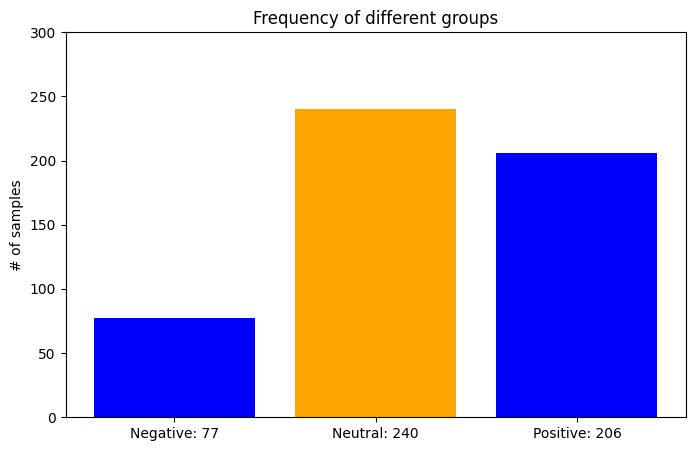

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111)
target = ['Negative: 77', 'Neutral: 240','Positive: 206']
hists = [group[0], group[1], group[2]]
ax.bar(target,hists, color=['blue','orange'])
plt.title("Frequency of different groups")
plt.ylabel('# of samples')
plt.ylim(0,300)
plt.savefig("FrequencyHist.jpg")
plt.show()

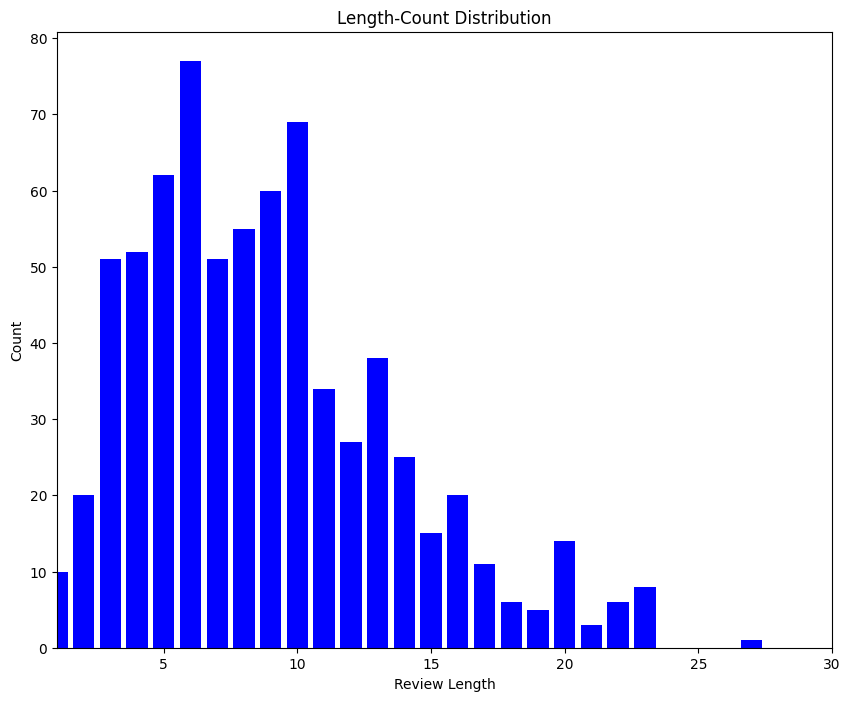

Maximum Length: 27
Minimum Length: 1
Average Length: 9.0


In [ ]:
data['ReviewLength'] = data.Review.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.figure(figsize=(10, 8))
plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 30)
# in this notbook color is not working but it should work.
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Length-Count Distribution')
#plt.savefig('LengthCount.jpg')
plt.show()  
print(f"Maximum Length: {max(data.ReviewLength)}")
print(f"Minimum Length: {min(data.ReviewLength)}")
print(f"Average Length: {round(np.mean(data.ReviewLength),0)}")

In [ ]:
data.describe()

,ReviewLength
count,523.000000
mean,8.803059
std,4.715816
min,1.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,27.000000


In [ ]:
average = data['ReviewLength'].mean() 
print("Average Length: {0:.2f}".format(average))#precision control

med = data['ReviewLength'].median()  #median of a data coloumn
print("Median of Review Length: {0:.2f}".format(med))

standard_deviation = data['ReviewLength'].std() #panda standard deviation
print("Standard Deviation of Review Length: {0:.2f}".format(standard_deviation))

var1 = data['ReviewLength'].var() #variance
print("Review Length Variance: {0:.2f}".format(var1))

md=data['ReviewLength'].mode()
print("Review Length Mode: {0:.2f}".format(md[0]))

minimum = data['ReviewLength'].min() #pandas minimum value
print("Minimun Review Lenth: {0:.2f}".format(minimum))

maximum = data['ReviewLength'].max() #pandas maximum value
print("Maximum Review Lenth: {0:.2f}".format(maximum))

#print(data['ReviewLength'].skew())#calculating skew
print("Skewness of Data: {0:.2f}".format(data['ReviewLength'].skew()))

#print(data['ReviewLength'].kurtosis())#calculating kurtosis
print("Kurtosis of Data: {0:.2f}".format(data['ReviewLength'].kurtosis()))

Average Length: 8.80
Median of Review Length: 8.00
Standard Deviation of Review Length: 4.72
Review Length Variance: 22.24
Review Length Mode: 6.00
Minimun Review Lenth: 1.00
Maximum Review Lenth: 27.00
Skewness of Data: 0.88
Kurtosis of Data: 0.56


<ipython-input-18-c1801caadd37>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])


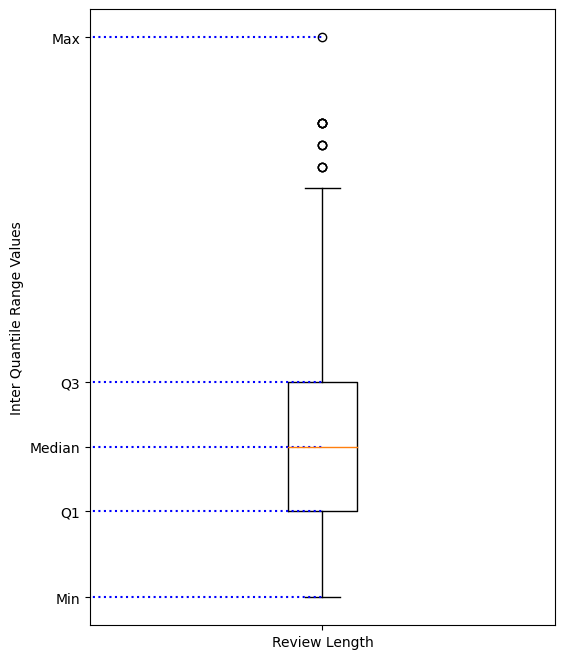

In [ ]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111) 

#ax.set_title('Outliers can be seen both above and below the IQR')
ax.boxplot(data['ReviewLength'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['Review Length'])
quantiles = np.quantile(data['ReviewLength'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls='dotted')
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
#plt.savefig('boxPlotWithOutliers.jpg')
plt.show()

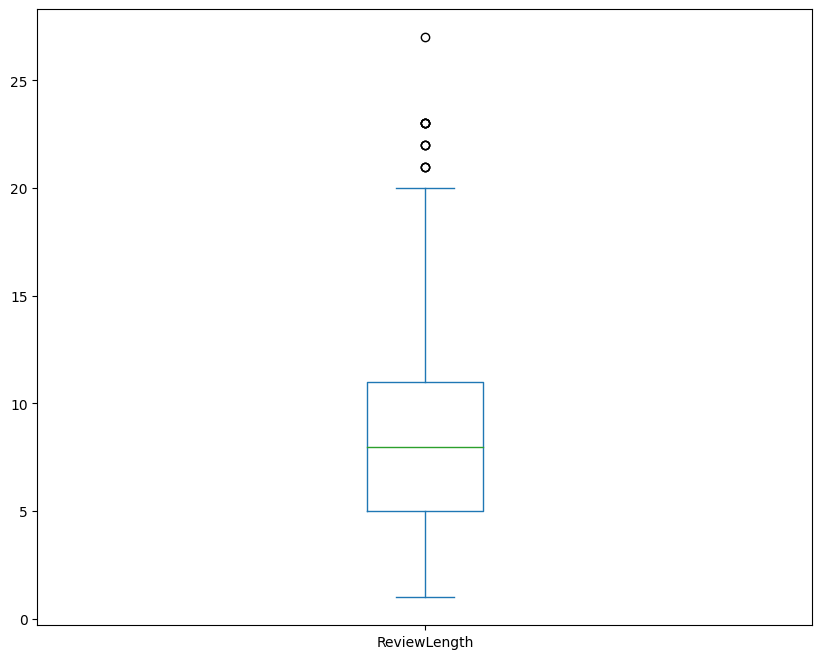

In [ ]:
plt.figure(figsize=(10, 8))
data['ReviewLength'].plot(kind ='box')
#plt.savefig('boxPlotWithOutliers.jpg')
plt.show()

In [ ]:
quantiles = np.quantile(data['ReviewLength'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
Q1=quantiles[1]
Q3=quantiles[3]
IQR=Q3-Q1
print("Q1: ", Q1, ", Q3: ", Q3, "IQR: ", IQR)
data = data[~((data['ReviewLength']<(Q1-1.5*IQR)) | (data['ReviewLength']>(Q3+1.5*IQR)))]

Q1:  5.0 , Q3:  11.0 IQR:  6.0


<ipython-input-22-745cbb8accaa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])


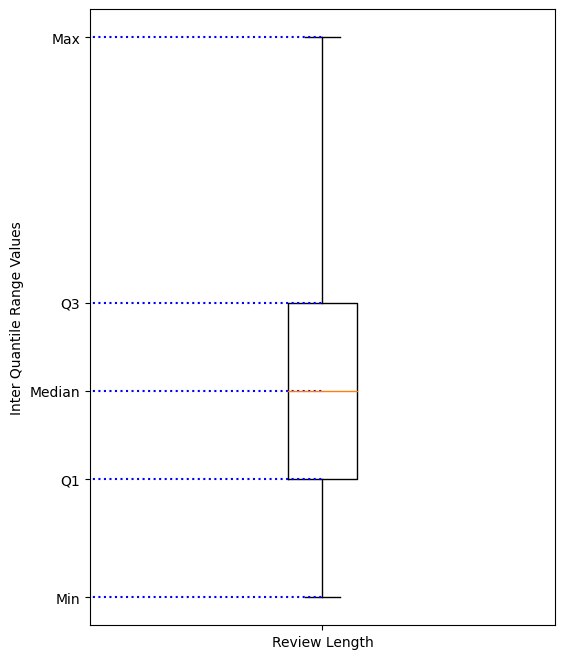

In [ ]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111) 
ax.boxplot(data['ReviewLength'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['Review Length'])
quantiles = np.quantile(data['ReviewLength'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls='dotted')
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
#plt.savefig('boxPlotWithoutOutliers.jpg')
plt.show()

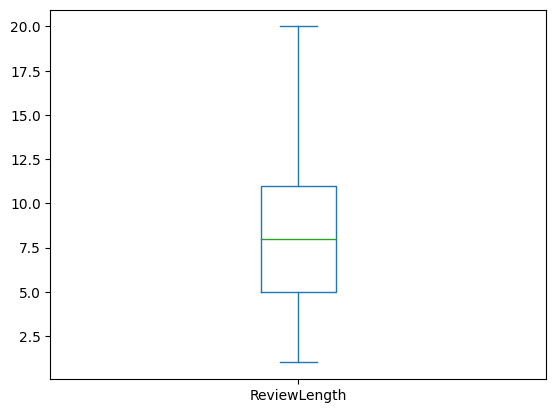

In [ ]:
data['ReviewLength'].plot(kind ='box')
#plt.savefig('boxPlotWithoutOutliers.jpg')
plt.show()

In [ ]:
df1 = pd.DataFrame()
df1['Sentiment'] = data['Sentiment']
df1["Sentiment"] = df1["Sentiment"].replace(['Neutral'], 0)
df1["Sentiment"] = df1["Sentiment"].replace(['Positive'], 1)
df1["Sentiment"] = df1["Sentiment"].replace(['Negative'], -1)
reviewLen = np.array(data['ReviewLength'])
sentiment = np.array(df1['Sentiment'])
arr = np.stack((reviewLen, sentiment), axis=1)
df = pd.DataFrame(arr, columns=['ReviewLength', 'Sentiment'])
pearson_correlation = df.corr(method='pearson')
print(pearson_correlation)

              ReviewLength  Sentiment
ReviewLength      1.000000  -0.062067
Sentiment        -0.062067   1.000000


In [ ]:
import scipy.stats as stats
pearson_correlation = stats.pearsonr(data['ReviewLength'], df1['Sentiment'])
pearson_correlation

PearsonRResult(statistic=-0.06206725362605256, pvalue=0.16122470207460812)

[[ 1.         -0.06206725]
 [-0.06206725  1.        ]]


<Figure size 2000x1000 with 0 Axes>

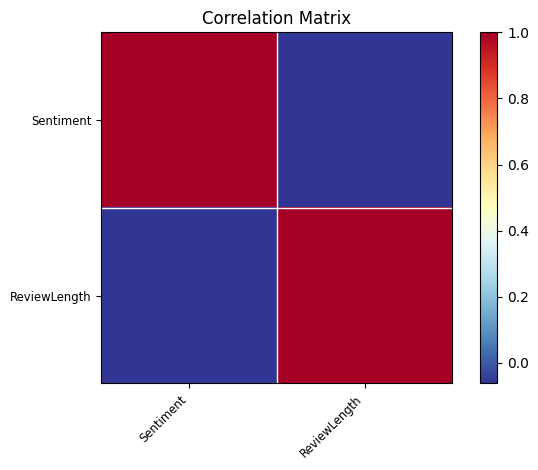

In [ ]:
import statsmodels.graphics.api as smg

# Correlation matrix
plt.figure(figsize=(20, 10))
correlation_matrix = np.corrcoef(df1['Sentiment'], data['ReviewLength'])
print(correlation_matrix)

# Correlation plot
smg.plot_corr(correlation_matrix, xnames=['Sentiment', 'ReviewLength'])
#plt.savefig('correlation2.jpg')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
#if the review length is larger, the review of the product is negative
contigency= pd.crosstab(data['ReviewLength'], df1['Sentiment'])
contigency

c, p, dof, expected = chi2_contingency(contigency)
p

print("Statistical Value: " + str(c))
print("Degrees of Freedom: " + str(dof))
print("p-value: " + str(p)) 
#print("Expected value: " + str(expected)) 

significance_level = 0.05
if p <= significance_level: 
    print('REJECT NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

Statistical Value: 44.382890404591464
Degrees of Freedom: 38
p-value: 0.22055282309392626
ACCEPT NULL HYPOTHESIS


#####Data Balancing

In [ ]:
print("Total Number of sample: ", data.shape[0])
print("Total Positive Data: ", len(data[data.Sentiment == 'Positive']))
print("Total Positive Data: ", len(data[data.Sentiment == 'Negative']))
print("Total Positive Data: ", len(data[data.Sentiment == 'Neutral']))

Total Number of sample:  523
Total Positive Data:  206
Total Positive Data:  77
Total Positive Data:  240


In [ ]:
import numpy as np
X = data.Review
X = np.array(X) 
X = X.reshape(-1, 1)
y = data.Sentiment
y = np.array(y) 
y = y.reshape(-1, 1)

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
df1 = pd.DataFrame(X_resampled, columns = ['Review'])
data.Review = df1
df2 = pd.DataFrame(y_resampled, columns = ['Sentiment'])
data.Sentiment = df2

In [ ]:
df = pd.DataFrame([df2.Sentiment, df1.Review]).transpose()
df.shape

(720, 2)

In [ ]:
data = df

In [ ]:
print("Total Number of sample: ", data.shape[0])
print("Total Positive Data: ", len(data[data.Sentiment == 'Positive']))
print("Total Positive Data: ", len(data[data.Sentiment == 'Negative']))
print("Total Positive Data: ", len(data[data.Sentiment == 'Neutral']))

Total Number of sample:  720
Total Positive Data:  240
Total Positive Data:  240
Total Positive Data:  240


##### Data Cleaning

In [ ]:
# DATA CLEANING FUNCTION
def process_reviews(Review):
    # REMOVING UNNECESSARY PUNCTUATIONS
    Review = re.sub('[^\u0980-\u09FF]',' ',Review)
    return Review

In [ ]:
# APPLYING CLEANING FUNCTION
data['Review_Cleaned'] = data['Review'].apply(process_reviews)

sample_data = [75, 303, 316, 347, 324]
for i in sample_data:
     print('\nOriginal Review:',data.Review[i],'\nCleaned Review:',
           data.Review_Cleaned[i],'\nSentiment:',data.Sentiment[i])


Original Review: এতে ক্যামেরা নেই, ফেসবুক নেই আরও অনেক কিছু নেই 
Cleaned Review: এতে ক্যামেরা নেই  ফেসবুক নেই আরও অনেক কিছু নেই 
Sentiment: Negative

Original Review: পুরা কাংগালীর হাসি। 
Cleaned Review: পুরা কাংগালীর হাসি  
Sentiment: Positive

Original Review: ! কাবাব এর মধ্যে ছিল চিকেন কাবাব, গ্রিল ক্রাব কাবাব, বিফ কাবাব। 
Cleaned Review:   কাবাব এর মধ্যে ছিল চিকেন কাবাব  গ্রিল ক্রাব কাবাব  বিফ কাবাব  
Sentiment: Neutral

Original Review: প্লেটার - কাচ্চি প্লেটার ৩ জন 
Cleaned Review: প্লেটার   কাচ্চি প্লেটার ৩ জন 
Sentiment: Negative

Original Review: যেভাবে বর্ণনা দিলেন, মনে হইতেসে রাজা-বাদশারা চোখের সামনে ঘুরাঘুরি করতেছে। 
Cleaned Review: যেভাবে বর্ণনা দিলেন  মনে হইতেসে রাজা বাদশারা চোখের সামনে ঘুরাঘুরি করতেছে  
Sentiment: Neutral


##### Data Summary (Low Level)

In [ ]:
def data_summary(dataset):
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Review_Cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Sentiment.value_counts().to_dict().items()]
    
    # FINDING WORD LIST
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.Sentiment==label].Review_Cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # SORTING THE DICTIONARY OF WORD LIST
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # DOCUMENT COUNT
        documents.append(len(list(dataset[dataset.Sentiment==label].Review_Cleaned)))
        # WORD COUNT
        words.append(len(word_list))
        # UNIQUE WORD COUNT
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name:",label)
        print("Number of Documents: {}".format(len(list(dataset[dataset.Sentiment==label].Review_Cleaned))))
        print("Number of Words: {}".format(len(word_list)))
        print("Number of Unique Words: {}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
        print("=================================================")
    print("\nTotal Number of Unique Words: {}".format(len(np.unique(total_u_words))))
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(data)


Class Name: Neutral
Number of Documents: 241
Number of Words: 2140
Number of Unique Words: 1079
Most Frequent Words:

না	33
আমি	28
আমার	24
করে	19
এর	18
জন্য	18
পারেন	17
আর	16
এবং	16
আপনার	14

Class Name: Positive
Number of Documents: 206
Number of Words: 1759
Number of Unique Words: 828
Most Frequent Words:

ভালো	35
এবং	27
খুব	24
আমি	24
সুন্দর	22
এর	19
একটি	19
১০	18
আর	17
এই	17

Class Name: Negative
Number of Documents: 76
Number of Words: 702
Number of Unique Words: 466
Most Frequent Words:

না	17
আর	11
ছিল	9
করে	9
আমি	8
কিন্তু	7
অনেক	7
সব	5
অর্ডার	5
নেই	5

Total Number of Unique Words: 1801


##### Removing Stop Words

In [ ]:
# IMPORTING STOP WORDS FILE
my_file = open(path + "stopWords.txt", "r")
allStopWords = my_file.read()
stopWords = allStopWords.split()
my_file.close()

data['Stop_Words_Removed'] = data['Review_Cleaned']
# REMOVING THE STOP WORDS
for sw in stopWords:
    data['Stop_Words_Removed'] = data['Stop_Words_Removed'].str.replace(
        '(^|[ ])' + sw + '([ ]|$)', ' ', regex=True)

data.head()

,Review,Sentiment,Review_Cleaned,Stop_Words_Removed
0,দাম অনুযায়ী প্রোডাক্ট ঠিক আছে,Positive,দাম অনুযায়ী প্রোডাক্ট ঠিক আছে,দাম অনুযায়ী প্রোডাক্ট ঠিক
1,কিন্তু ওড়না পর্যন্ত সেলাই করে নিতে হবে সেটা আগ...,Neutral,কিন্তু ওড়না পর্যন্ত সেলাই করে নিতে হবে সেটা আগ...,ওড়না সেলাই দেয়ার দরকার
2,প্রোডাক্টের মান ভালো না,Negative,প্রোডাক্টের মান ভালো না,প্রোডাক্টের মান ভালো না
3,কাপড়ে দাগ ছিল,Negative,কাপড়ে দাগ ছিল,কাপড়ে দাগ
4,তাছাড়া ছবিতে যেমটা বাস্তবে তেমনটা নয়,Negative,তাছাড়া ছবিতে যেমটা বাস্তবে তেমনটা নয়,ছবিতে যেমটা বাস্তবে তেমনটা নয়


##### Stemming

In [ ]:
!pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bnltk-0.7.6-py3-none-any.whl (11 kB)
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# IMPORTING BNLTK IF ALREADY NOT IMPORTED
from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()

# APPLYING STEMMING
tempStemmedList = []
for i in range(0, len(data)):
  lst = data.Stop_Words_Removed[i].split()
  for i, x in enumerate(lst):
      lst[i] = bn_stemmer.stem(x)
  tempStemmedList.append(' '.join([elem for elem in lst]))

data['Stemmed_Review'] = tempStemmedList
data.head()

ModuleNotFoundError: ignored

In [ ]:
def label_encoding(sentiment,bool):
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    # CONVERTING INTO NUMPY ARRAY
    labels = np.array(encoded_labels)
    # DEFINING THE CLASS NAMES
    class_names = le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

def dataset_split(feature_space,sentiment):
    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.5,
                                                  test_size = 0.5,random_state = 0)
    print("\nFeature Size :======>",X_train.shape[1])
    print("Dataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
data['cleaned'] = data.Stemmed_Review.apply(lambda x:x.replace('\n',' '))

In [ ]:
data.head()

,Review,Sentiment,Review_Cleaned,Stop_Words_Removed,cleaned
0,দাম অনুযায়ী প্রোডাক্ট ঠিক আছে,Positive,দাম অনুযায়ী প্রোডাক্ট ঠিক আছে,দাম অনুযায়ী প্রোডাক্ট ঠিক,দাম অনুযায়ী প্রোডাক্ট ঠিক
1,কিন্তু ওড়না পর্যন্ত সেলাই করে নিতে হবে সেটা আগ...,Neutral,কিন্তু ওড়না পর্যন্ত সেলাই করে নিতে হবে সেটা আগ...,ওড়না সেলাই দেয়ার দরকার,ওড়না সেলাই দেয়ার দরকার
2,প্রোডাক্টের মান ভালো না,Negative,প্রোডাক্টের মান ভালো না,প্রোডাক্টের মান ভালো না,প্রোডাক্টের মান ভালো না
3,কাপড়ে দাগ ছিল,Negative,কাপড়ে দাগ ছিল,কাপড়ে দাগ,কাপড়ে দাগ
4,তাছাড়া ছবিতে যেমটা বাস্তবে তেমনটা নয়,Negative,তাছাড়া ছবিতে যেমটা বাস্তবে তেমনটা নয়,ছবিতে যেমটা বাস্তবে তেমনটা নয়,ছবিতে যেমটা বাস্তবে তেমনটা নয়


##### TF-IDF

In [ ]:
def calc_gram_tfidf(reviews,gram):
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True, tokenizer=None) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

##### Importing ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

##### Training

In [ ]:
from numpy.lib.function_base import average
def ml_models_defination():
    lr_model = LogisticRegression(multi_class='ovr', random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 10)
    knn_model = KNeighborsClassifier(n_neighbors=21, metric = 'euclidean')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','KNN','SVM']

    ml_models = [lr_model,dt_model,rf_model,knn_model,lsvm_model]
    return ml_models,model_names 
    

def model_performace(model,X_train,X_test,y_train,y_test):
    my_dict = {}
    model.fit(X_train,y_train)
    # PREDICTION
    pred_y = model.predict(X_test)

    my_dict['Accuracy'] = np.round(accuracy_score(y_test, pred_y), 4)*100 
    my_dict['Precision'] = np.round(precision_score(y_test, pred_y,average='weighted',zero_division=0), 4)*100 
    my_dict['Recall'] = np.round(recall_score(y_test, pred_y, average='weighted',zero_division=0), 4)*100 
    my_dict['F1 Score'] = np.round(f1_score(y_test, pred_y, average='weighted',zero_division=0), 4)*100 
    
    return my_dict  
    

def performance_table(performance_dict):
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['LR','DT','RF','KNN','SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

##### Testing

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.cleaned,gram)
    labels = label_encoding(data.Sentiment,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()

    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    print(accuracy)
    
    # SAVING THE PERFORMANCE PARAMETERS INTO JSON FILES
    with open(path + f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)


Feature Size :======> 505
Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 523 
	Training		 261 
	Test			 262
{'Logistic Regression': {'Accuracy': 59.540000000000006, 'Precision': 52.33, 'Recall': 59.540000000000006, 'F1 Score': 54.25}, 'Decision Tree': {'Accuracy': 58.02, 'Precision': 54.43, 'Recall': 58.02, 'F1 Score': 54.82}, 'Random Forest': {'Accuracy': 56.87, 'Precision': 51.85999999999999, 'Recall': 56.87, 'F1 Score': 53.37}, 'KNN': {'Accuracy': 56.489999999999995, 'Precision': 49.69, 'Recall': 56.489999999999995, 'F1 Score': 51.25999999999999}, 'SVM': {'Accuracy': 49.62, 'Precision': 60.64000000000001, 'Recall': 49.62, 'F1 Score': 36.19}}

Feature Size :======> 1537
Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 523 
	Training		 261 
	Test			 262
{'Logistic Regression': {'Accuracy': 58.4, 'Precision': 53.92, 'Recall': 58.4, 'F1 Score': 52.31}, 'Decision Tree': {'Accuracy': 61.07, 'Precision': 58.199999999999996, 'Recall': 61.07, 'F1 Score'

In [ ]:
for gram in gram_names:
  accuracy = json.load(open(path + f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {np.round(max(table.Accuracy), 2)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {np.round(max(table['F1 Score'] ), 2)}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {np.round(max(table['Precision'] ), 2)}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {np.round(max(table['Recall'] ), 2)}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0     59.54      52.33   59.54     54.25         LR
1     58.02      54.43   58.02     54.82         DT
2     56.87      51.86   56.87     53.37         RF
3     56.49      49.69   56.49     51.26        KNN
4     49.62      60.64   49.62     36.19        SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 59.54
Highest F1-Score achieved by DT at = 54.82
Highest Precision Score achieved by SVM at = 60.64
Highest Recall Score achieved by LR at = 59.54

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0     58.40      53.92   58.40     52.31         LR
1     61.07      58.20   61.07     57.10         DT
2     57.25      53.91   57.25     53.17         RF
3     54.96      46.81   54.96     50.22        KNN
4     46.95      60.04   46.95     30.83        SVM

========In case of Bigram fe

####Clustering

In [ ]:
tfidf,feature = calc_gram_tfidf(data.Review,(1,3))
labels = label_encoding(data.Sentiment)
    #X_train,X_test,y_train,y_test = dataset_split(feature,labels) 

from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters = 3)
result = kmeanModel.fit_predict(feature)
print("Hi")
result

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hi


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data['Output'] = result

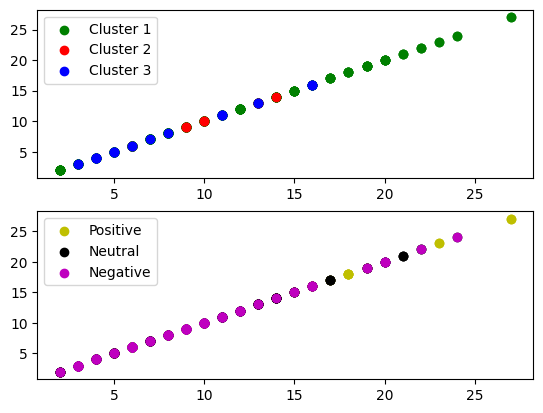

In [ ]:
fig, axs = plt.subplots(2)
cluster1 = data[data['Output'] == 0]
cluster2 = data[data['Output'] == 1]
cluster3 = data[data['Output'] == 2]
group1 = data[data['Sentiment']=='Positive']
group2 = data[data['Sentiment']=='Neutral']
group3 = data[data['Sentiment']=='Negative']
axs[0].scatter(cluster1['length'], cluster1['length'], color = 'g', label = 'Cluster 1')
axs[0].scatter(cluster2['length'], cluster2['length'], color = 'r', label = 'Cluster 2')
axs[0].scatter(cluster3['length'], cluster3['length'], color = 'b', label = 'Cluster 3')
axs[0].legend()

axs[1].scatter(group1['length'], group1['length'], color = 'y', label = 'Positive')
axs[1].scatter(group2['length'], group2['length'], color = 'k', label = 'Neutral')
axs[1].scatter(group3['length'], group3['length'], color = 'm', label = 'Negative')
axs[1].legend()
#plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], color = 'b', marker = '*', label = 'centroids')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
plt.savefig('cluster.jpg')


##### LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical

In [ ]:
max_fatures = 2500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['cleaned'].values)
X = tokenizer.texts_to_sequences(data['cleaned'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 64
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(embed_dim, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['acc'])
# model.summary()

In [ ]:
Y = pd.get_dummies(data['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
history=model.fit(X_train, Y_train, epochs = 30, batch_size=32, verbose = 2,validation_split=0.25)

In [ ]:
score = model.evaluate(X_train, Y_train,batch_size=64, verbose=2)
# print('Train loss:', score[0])
print('Train accuracy:', score[1])

In [ ]:
score = model.evaluate(X_test, Y_test,batch_size=64, verbose=2)
# print('Test loss:', score[0])
print('Test accuracy:', score[1])